In [1]:
## Importing packages
import pandas as pd
import numpy as np 
import datetime as dt
from  matplotlib import pyplot as plt
import scipy .stats as stats
import seaborn as sns
import plotly.express as px

In [2]:
## loading data
data=pd.read_csv("/Users/reetarora/Downloads/ineouron project work/BSOFT.NS.csv")

In [3]:
data

Date        Open        High         Low       Close   Adj Close  \
0    2022-01-14  568.900024  568.900024  553.000000  557.000000  549.108398   
1    2022-01-17  557.000000  562.950012  545.599976  549.549988  541.763916   
2    2022-01-18  550.000000  553.599976  531.000000  534.700012  527.124329   
3    2022-01-19  532.000000  532.000000  502.600006  512.900024  505.633240   
4    2022-01-20  514.000000  515.500000  497.000000  502.100006  494.986237   
..          ...         ...         ...         ...         ...         ...   
244  2023-01-09  287.399994  294.950012  287.399994  293.649994  293.649994   
245  2023-01-10  293.450012  293.450012  288.000000  290.350006  290.350006   
246  2023-01-11  291.850006  297.950012  290.500000  294.299988  294.299988   
247  2023-01-12  295.799988  296.799988  287.850006  289.700012  289.700012   
248  2023-01-13  292.799988  295.000000  287.299988  293.700012  293.700012   

      Volume  
0    2063358  
1    3256402  
2    2514178  
3    5539545  
4    3023445  
..       ...  
244  3174952  
245  1398351  
246  1536020  
247  1262689  
248  2186938  

[249 rows x 7 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [5]:
#column names
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
#### Taking specific column 
data.drop(columns='Adj Close',inplace=True)

In [7]:
data

Date        Open        High         Low       Close   Volume
0    2022-01-14  568.900024  568.900024  553.000000  557.000000  2063358
1    2022-01-17  557.000000  562.950012  545.599976  549.549988  3256402
2    2022-01-18  550.000000  553.599976  531.000000  534.700012  2514178
3    2022-01-19  532.000000  532.000000  502.600006  512.900024  5539545
4    2022-01-20  514.000000  515.500000  497.000000  502.100006  3023445
..          ...         ...         ...         ...         ...      ...
244  2023-01-09  287.399994  294.950012  287.399994  293.649994  3174952
245  2023-01-10  293.450012  293.450012  288.000000  290.350006  1398351
246  2023-01-11  291.850006  297.950012  290.500000  294.299988  1536020
247  2023-01-12  295.799988  296.799988  287.850006  289.700012  1262689
248  2023-01-13  292.799988  295.000000  287.299988  293.700012  2186938

[249 rows x 6 columns]

In [8]:
data["Date"]=pd.to_datetime(data["Date"])

In [9]:
#changing Index
data.set_index(data["Date"],inplace=True)


In [10]:
# Extracting month and year from date
data["Month"]=data["Date"].dt.strftime("%b")
data["year"]=data["Date"].dt.year
data["Month_year"]=data["Date"].dt.date.astype(str).str[0:7]

In [11]:
data

Date        Open        High         Low       Close  \
Date                                                                    
2022-01-14 2022-01-14  568.900024  568.900024  553.000000  557.000000   
2022-01-17 2022-01-17  557.000000  562.950012  545.599976  549.549988   
2022-01-18 2022-01-18  550.000000  553.599976  531.000000  534.700012   
2022-01-19 2022-01-19  532.000000  532.000000  502.600006  512.900024   
2022-01-20 2022-01-20  514.000000  515.500000  497.000000  502.100006   
...               ...         ...         ...         ...         ...   
2023-01-09 2023-01-09  287.399994  294.950012  287.399994  293.649994   
2023-01-10 2023-01-10  293.450012  293.450012  288.000000  290.350006   
2023-01-11 2023-01-11  291.850006  297.950012  290.500000  294.299988   
2023-01-12 2023-01-12  295.799988  296.799988  287.850006  289.700012   
2023-01-13 2023-01-13  292.799988  295.000000  287.299988  293.700012   

             Volume Month  year Month_year  
Date                                        
2022-01-14  2063358   Jan  2022    2022-01  
2022-01-17  3256402   Jan  2022    2022-01  
2022-01-18  2514178   Jan  2022    2022-01  
2022-01-19  5539545   Jan  2022    2022-01  
2022-01-20  3023445   Jan  2022    2022-01  
...             ...   ...   ...        ...  
2023-01-09  3174952   Jan  2023    2023-01  
2023-01-10  1398351   Jan  2023    2023-01  
2023-01-11  1536020   Jan  2023    2023-01  
2023-01-12  1262689   Jan  2023    2023-01  
2023-01-13  2186938   Jan  2023    2023-01  

[249 rows x 9 columns]

<AxesSubplot: xlabel='Month_year', ylabel='High'>

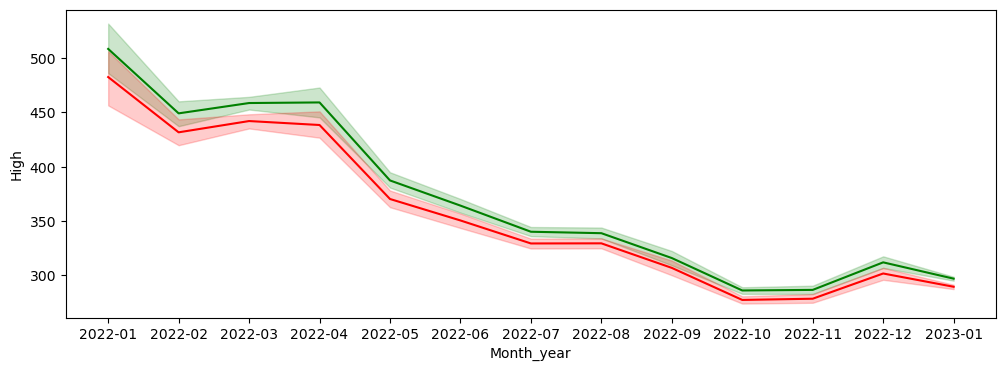

In [12]:
## Pattern of High and low going same....
plt.figure(figsize=(12,4))
sns.lineplot(x="Month_year",y="High",data=data,color="green")
sns.lineplot(x="Month_year",y="Low",data=data,color="red")

In [13]:
## Working with Opening Price
px.line(data,x=data["Month_year"],y=data["Open"])

In [14]:
## Working with Opening Price
px.bar(data,x=data["Date"],y=data["Open"])

<AxesSubplot: xlabel='Date'>

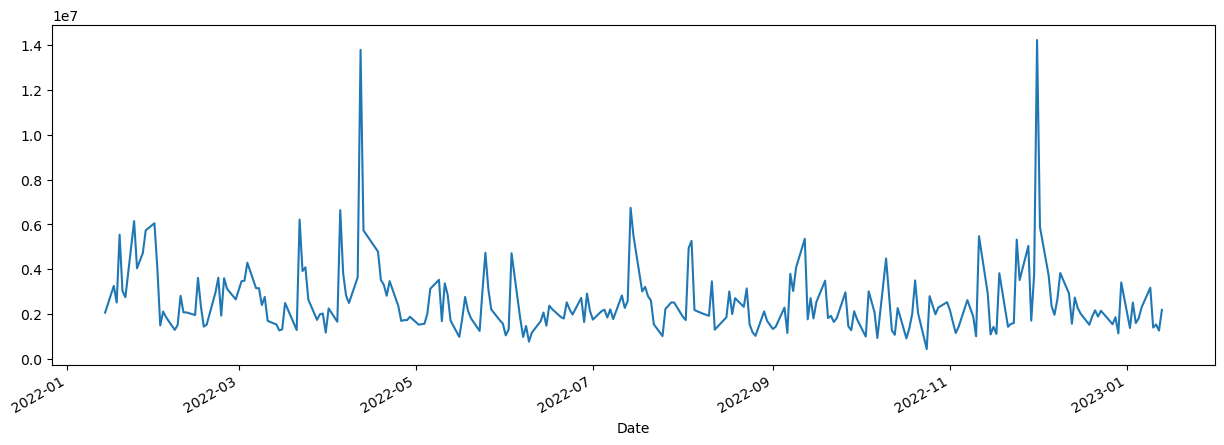

In [15]:
#### volume plot
plt.figure(figsize=(15,5))
data["Volume"].plot()

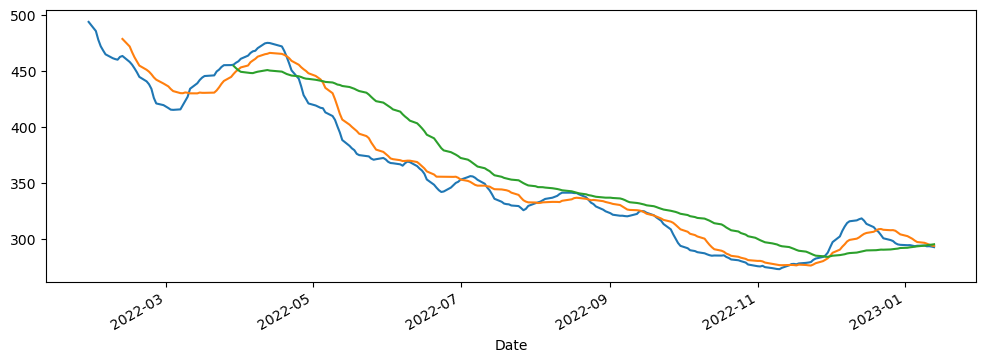

In [16]:
#### Moving average of Closing Price
ma=[10,20,50]
for x in ma:
    a=data["Close"].rolling(x).mean()
    a.plot(figsize=(12,4))
    


In [17]:
## maximum price in the last of months 
print("Max Price:",data.resample(rule="A").max()["High"])
print("----------------------------------------------------")
print("Min Price:",data.resample(rule="A").min()["High"])


Max Price: Date
2022-12-31    568.900024
2023-12-31    300.700012
Freq: A-DEC, Name: High, dtype: float64
----------------------------------------------------
Min Price: Date
2022-12-31    272.350006
2023-12-31    291.500000
Freq: A-DEC, Name: High, dtype: float64


/var/folders/94/yhxw3yzx6bn0kprcf_00sq800000gn/T/ipykernel_1099/801772489.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

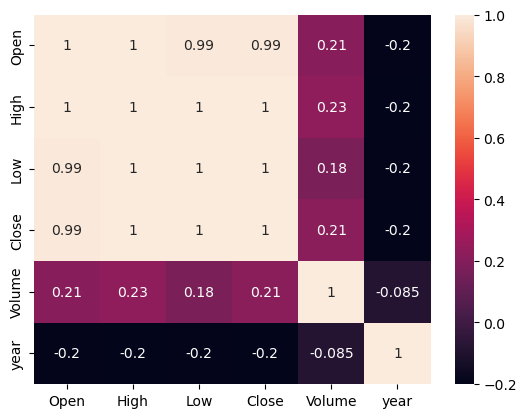

In [18]:
##### Checking correlation 
sns.heatmap(data.corr(),annot=True)

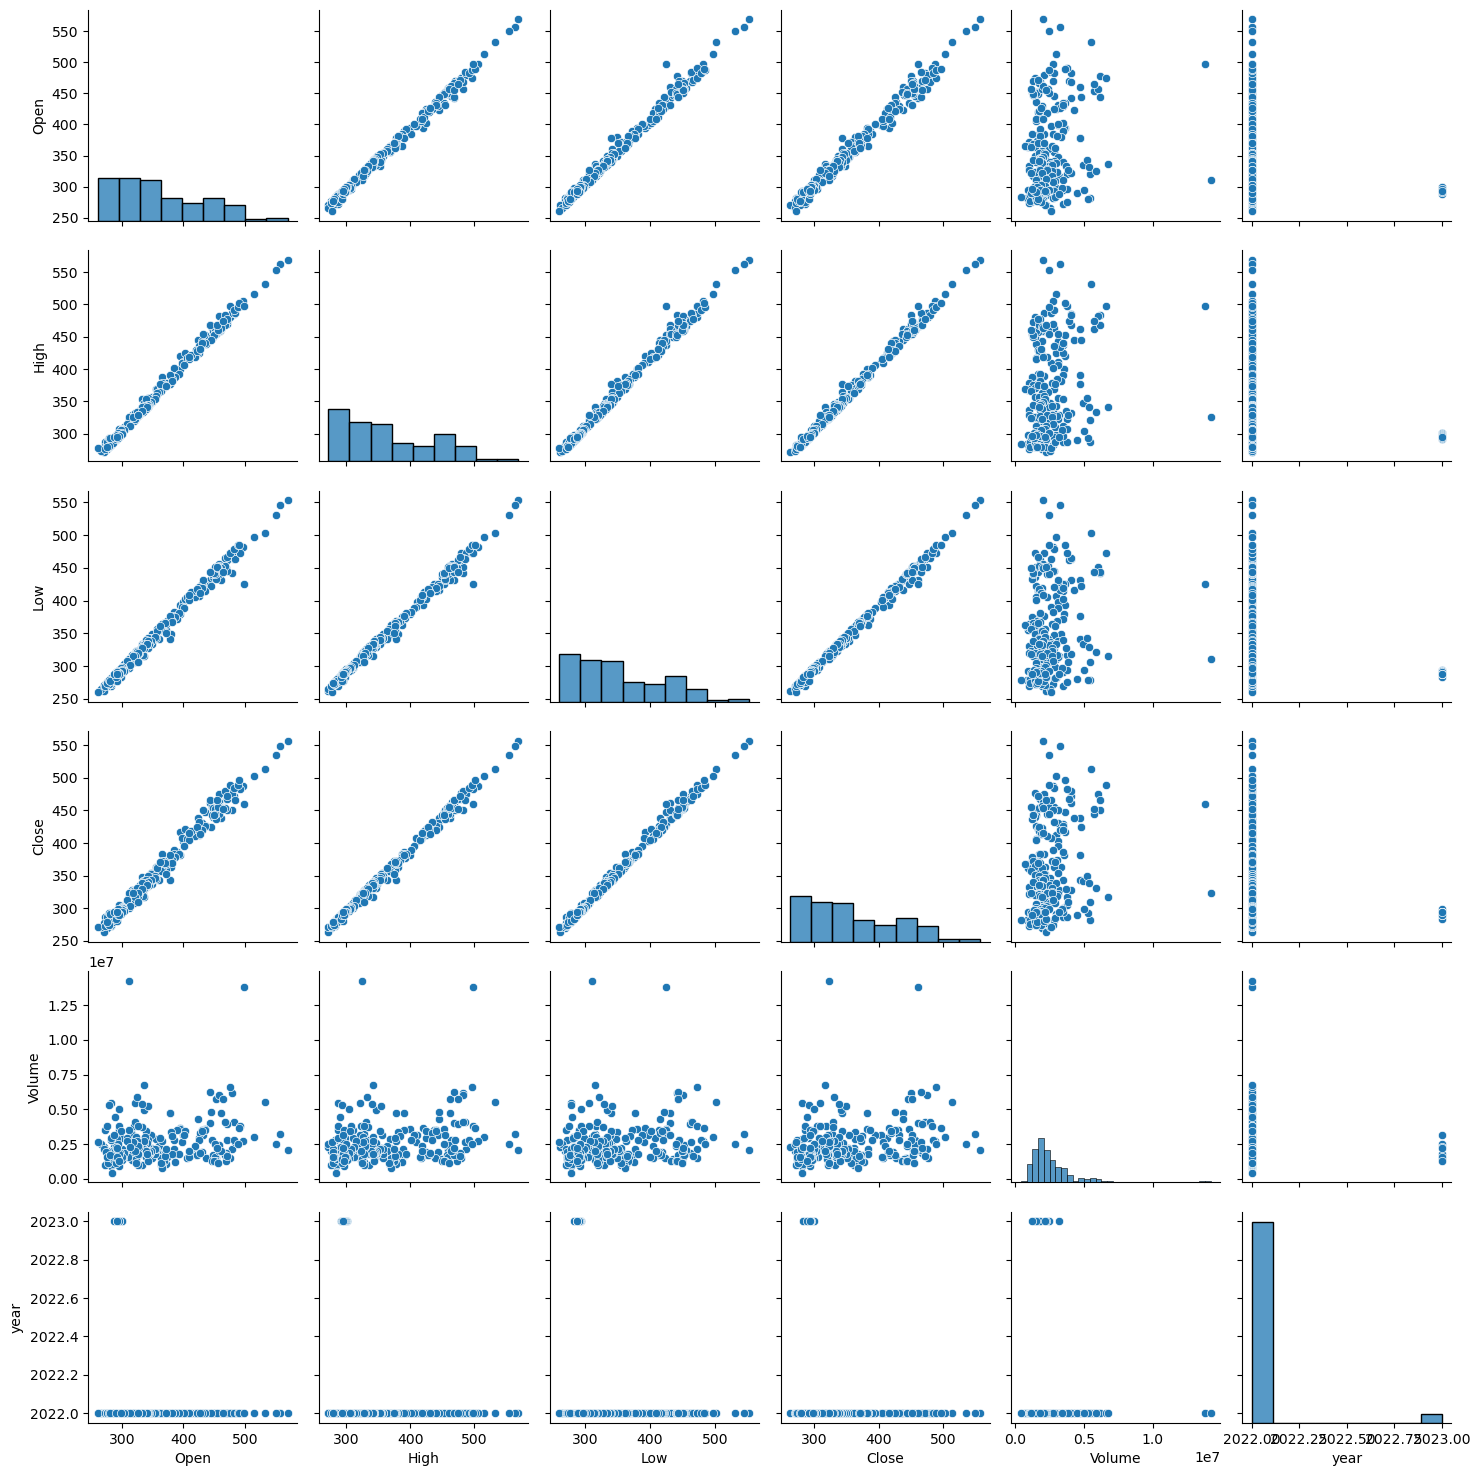

In [19]:
sns.pairplot(data)

In [20]:
data

Date        Open        High         Low       Close  \
Date                                                                    
2022-01-14 2022-01-14  568.900024  568.900024  553.000000  557.000000   
2022-01-17 2022-01-17  557.000000  562.950012  545.599976  549.549988   
2022-01-18 2022-01-18  550.000000  553.599976  531.000000  534.700012   
2022-01-19 2022-01-19  532.000000  532.000000  502.600006  512.900024   
2022-01-20 2022-01-20  514.000000  515.500000  497.000000  502.100006   
...               ...         ...         ...         ...         ...   
2023-01-09 2023-01-09  287.399994  294.950012  287.399994  293.649994   
2023-01-10 2023-01-10  293.450012  293.450012  288.000000  290.350006   
2023-01-11 2023-01-11  291.850006  297.950012  290.500000  294.299988   
2023-01-12 2023-01-12  295.799988  296.799988  287.850006  289.700012   
2023-01-13 2023-01-13  292.799988  295.000000  287.299988  293.700012   

             Volume Month  year Month_year  
Date                                        
2022-01-14  2063358   Jan  2022    2022-01  
2022-01-17  3256402   Jan  2022    2022-01  
2022-01-18  2514178   Jan  2022    2022-01  
2022-01-19  5539545   Jan  2022    2022-01  
2022-01-20  3023445   Jan  2022    2022-01  
...             ...   ...   ...        ...  
2023-01-09  3174952   Jan  2023    2023-01  
2023-01-10  1398351   Jan  2023    2023-01  
2023-01-11  1536020   Jan  2023    2023-01  
2023-01-12  1262689   Jan  2023    2023-01  
2023-01-13  2186938   Jan  2023    2023-01  

[249 rows x 9 columns]

<AxesSubplot: xlabel='Month_year', ylabel='Open'>

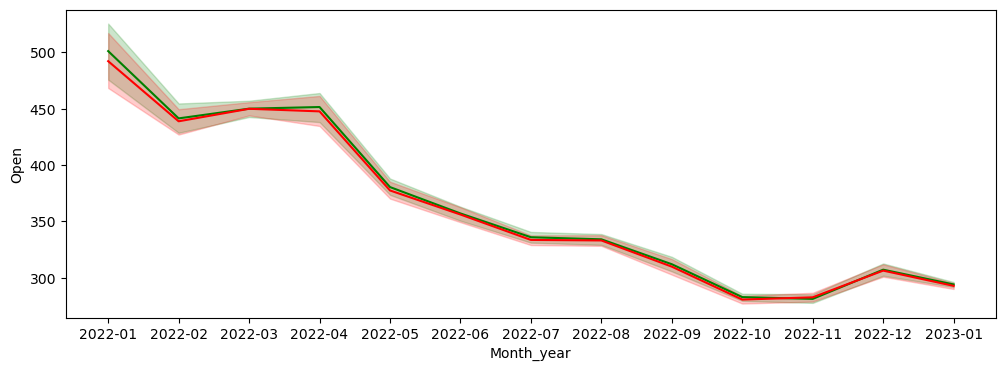

In [21]:
## Pattern of High and low going same....
plt.figure(figsize=(12,4))
sns.lineplot(x="Month_year",y="Open",data=data,color="green")
sns.lineplot(x="Month_year",y="Close",data=data,color="red")

In [22]:
#Extracting Day from date column
data["day"]=data["Date"].dt.strftime('%A')

<AxesSubplot: ylabel='Volume'>

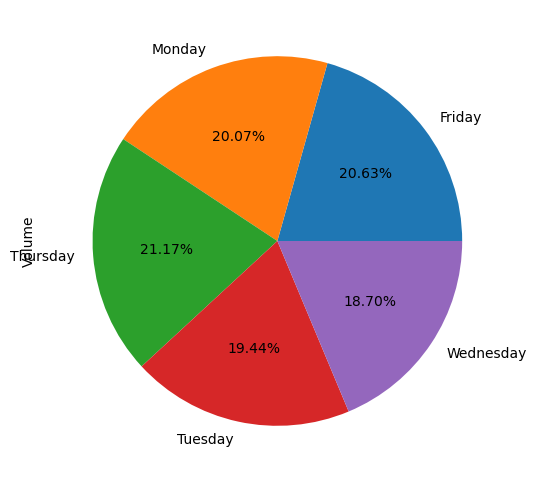

In [23]:
## Thursday have high sale and purchase of stocks
plt.figure(figsize=(15,6))
data.groupby(by="day")["Volume"].sum().plot(kind="pie",autopct="%.2f%%")

<AxesSubplot: xlabel='Month'>

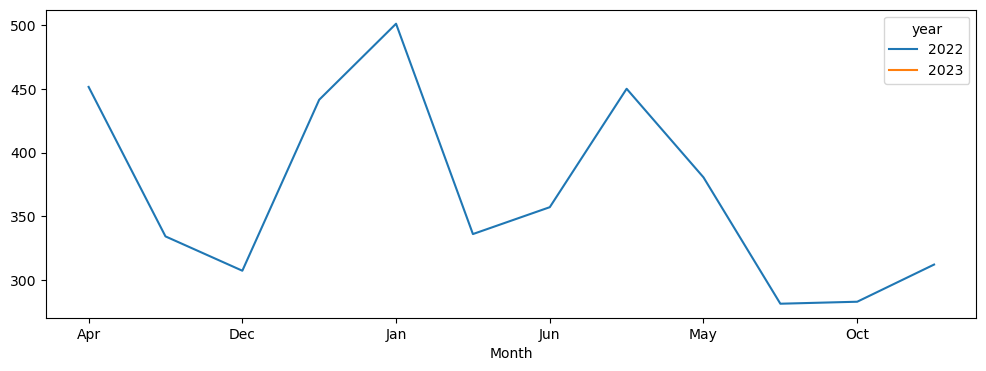

In [24]:
## Checking of opening price
pd.pivot_table(data=data,index="year",columns="Month",values="Open").T.plot(figsize=(12,4))

In [25]:
data

Date        Open        High         Low       Close  \
Date                                                                    
2022-01-14 2022-01-14  568.900024  568.900024  553.000000  557.000000   
2022-01-17 2022-01-17  557.000000  562.950012  545.599976  549.549988   
2022-01-18 2022-01-18  550.000000  553.599976  531.000000  534.700012   
2022-01-19 2022-01-19  532.000000  532.000000  502.600006  512.900024   
2022-01-20 2022-01-20  514.000000  515.500000  497.000000  502.100006   
...               ...         ...         ...         ...         ...   
2023-01-09 2023-01-09  287.399994  294.950012  287.399994  293.649994   
2023-01-10 2023-01-10  293.450012  293.450012  288.000000  290.350006   
2023-01-11 2023-01-11  291.850006  297.950012  290.500000  294.299988   
2023-01-12 2023-01-12  295.799988  296.799988  287.850006  289.700012   
2023-01-13 2023-01-13  292.799988  295.000000  287.299988  293.700012   

             Volume Month  year Month_year        day  
Date                                                   
2022-01-14  2063358   Jan  2022    2022-01     Friday  
2022-01-17  3256402   Jan  2022    2022-01     Monday  
2022-01-18  2514178   Jan  2022    2022-01    Tuesday  
2022-01-19  5539545   Jan  2022    2022-01  Wednesday  
2022-01-20  3023445   Jan  2022    2022-01   Thursday  
...             ...   ...   ...        ...        ...  
2023-01-09  3174952   Jan  2023    2023-01     Monday  
2023-01-10  1398351   Jan  2023    2023-01    Tuesday  
2023-01-11  1536020   Jan  2023    2023-01  Wednesday  
2023-01-12  1262689   Jan  2023    2023-01   Thursday  
2023-01-13  2186938   Jan  2023    2023-01     Friday  

[249 rows x 10 columns]

In [26]:
## Exporting cleaned data to excel 
data1=data[["High","Low","Close","Volume","Open"]]
data1.to_csv("ineuron_file.csv")

In [27]:
# splitting the data into X and Y
X=data[["High","Low","Close","Volume"]]
Y=data["Open"]

In [28]:
####Scaling the data
from sklearn.preprocessing import StandardScaler

In [29]:
std= StandardScaler()
X_std=std.fit_transform(X)

In [30]:
#####TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X_std,Y,test_size=0.1,random_state=100)

###### applying models
LINEAR REGRESSION

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
LR=LinearRegression()

In [34]:
LR.fit(X_train,Y_train)

LinearRegression()

In [35]:
LR_pred=LR.predict(X_test)

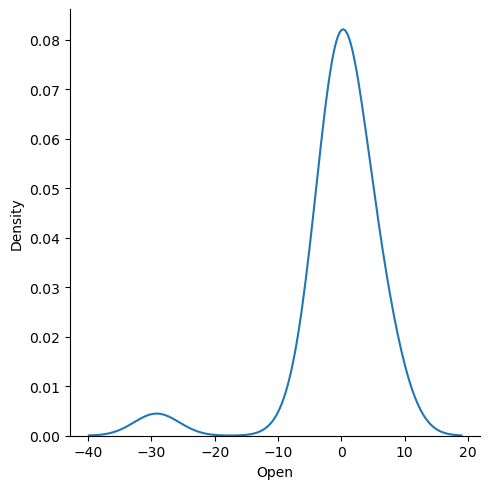

In [36]:
sns.displot(LR_pred-Y_test,kind="kde")

In [37]:
r2_score(Y_test,LR_pred)

0.9879089955910311

In [38]:
print("R2 score of trained data:", r2_score(Y_train,LR.predict(X_train)))
print("R2 score of test data:", r2_score(Y_test,LR.predict(X_test)))

R2 score of trained data: 0.9976198934877811
R2 score of test data: 0.9879089955910311


In [39]:
print("MAPE=",np.mean(np.abs((Y_test-LR_pred)/Y_test)))

MAPE= 0.008852836643426282


RANDOM FOREST

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
Rf=RandomForestRegressor()

In [42]:
param_grid = {"n_estimators":[100,150,200,300],
              "max_depth":[1,2,3,4]}
            
RF_Grid = GridSearchCV( Rf, param_grid)

In [43]:
RF_Grid.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 300]})

In [44]:
Rf_pred=RF_Grid.predict(X_test)

In [45]:
r2_score(Y_test,Rf_pred)

0.9633366168571137

In [46]:
print("R2 score of trained data:", r2_score(Y_train,RF_Grid.predict(X_train)))
print("R2 score of test data:", r2_score(Y_test,RF_Grid.predict(X_test)))

R2 score of trained data: 0.9967065066315044
R2 score of test data: 0.9633366168571137


In [47]:
print("MAPE=",np.mean(np.abs((Y_test-Rf_pred)/Y_test)))


MAPE= 0.018792344804613302


XGBOOST REGRESSOR

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'max_depth':[2,3,4,5],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

Ada_Grid= GridSearchCV(estimator=GradientBoostingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

Ada_Grid.fit(X_train,Y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:978: RuntimeWarning:

overflow encountered in square



GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [60, 70, 80, 100]},
             verbose=True)

In [50]:
Ada_pred=Ada_Grid.predict(X_test)

In [51]:
print("R2 score of trained data:", r2_score(Y_train,Ada_Grid.predict(X_train)))
print("R2 score of test data:", r2_score(Y_test,Ada_pred))

R2 score of trained data: 0.9992928779859067
R2 score of test data: 0.9740380885913382


In [52]:
print("MAPE=",np.mean(np.abs((Y_test-Ada_pred)/Y_test)))

MAPE= 0.01659838915495908


XG BOOST

In [53]:
import xgboost

In [54]:
pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

XG_Grid=gscv_xg.fit(X_train,Y_train)

In [55]:
XG_pred=XG_Grid.predict(X_test)

In [56]:
print("R2 score of trained data:", r2_score(Y_train,XG_Grid.predict(X_train)))
print("R2 score of test data:", r2_score(Y_test,XG_pred))

R2 score of trained data: 0.9993586512265514
R2 score of test data: 0.9727535576093732


In [57]:
print("MAPE=",np.mean(np.abs((Y_test-XG_pred)/Y_test)))

MAPE= 0.015913245078241045


SVM(Support Vector Machine)

In [58]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR 

In [59]:
tuned_parameters = [{'C': [1,0.1,0.001,10,100],
                    'gamma':[0.0001, 0.001, 0.01, 0.1],
                    'kernel':['linear','rbf','poly']}]

SVR_Grid = GridSearchCV(SVR(),
                   tuned_parameters,
                   cv=3)

SVR_Grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [1, 0.1, 0.001, 10, 100],
                          'gamma': [0.0001, 0.001, 0.01, 0.1],
                          'kernel': ['linear', 'rbf', 'poly']}])

In [60]:
SVR_pred=SVR_Grid.predict(X_test)

In [61]:
print("R2 score of trained data:", r2_score(Y_train,SVR_Grid.predict(X_train)))
print("R2 score of test data:", r2_score(Y_test,SVR_pred))

R2 score of trained data: 0.9976053675340282
R2 score of test data: 0.9878026093896422


In [62]:
print("MAPE=",np.mean(np.abs((Y_test-SVR_pred)/Y_test)))

MAPE= 0.009002018845923472


** As we can see SVR Model is better model with MAPE=0.009